<a href="https://colab.research.google.com/github/panks11/CE888/blob/main/labs/Lab1_Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [2]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [3]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [4]:

print(30*'*')
print('Data Info')
print('2 Columns Day and Sales , 14 Records/Rows')
print(30*'*')
print(df.info())
print(30*'*')
print('Data Statistics')
print(30*'*')
print(df.describe())
print(30*'*')

print(30*'*')
print('Sample Data')
print(30*'*')
print(df.head())

******************************
Data Info
2 Columns Day and Sales , 14 Records/Rows
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Day                          14 non-null     int64  
 1    Millons of pounds in sales  14 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 352.0 bytes
None
******************************
Data Statistics
******************************
           Day   Millons of pounds in sales
count  14.0000                    14.000000
mean    7.5000                     9.214286
std     4.1833                     5.898873
min     1.0000                     2.000000
25%     4.2500                     5.500000
50%     7.5000                     8.500000
75%    10.7500                    10.000000
max    14.0000                    22.000000
******************

In [5]:

# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->
	arr = np.zeros((n_bootstraps, sample_size))
	for bootstraps in range(n_bootstraps):
		arr[bootstraps,:] = np.random.choice(x,sample_size)
	data_mean = np.mean(arr)
	lower = np.percentile(np.mean(arr,axis=1),2.5)
	upper = np.percentile(np.mean(arr,axis=1),97.5)
	return data_mean, lower, upper


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

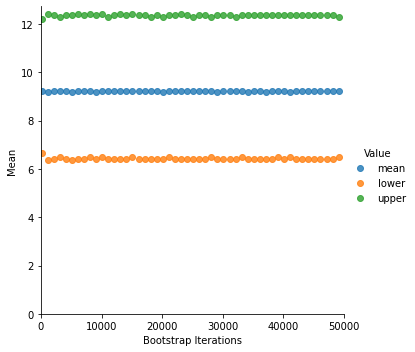

In [ ]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [32]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
	
	arr = np.zeros((n_bootstraps, sample_size))
	for bootstraps in range(n_bootstraps):
		arr[bootstraps,:] = np.random.choice(sample,sample_size)
	data_mean = np.mean(arr)
	lower = np.percentile(np.mean(arr,axis=1),((100-ci)/2))
	upper = np.percentile(np.mean(arr,axis=1),(100 - (100-ci)/2))
	return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

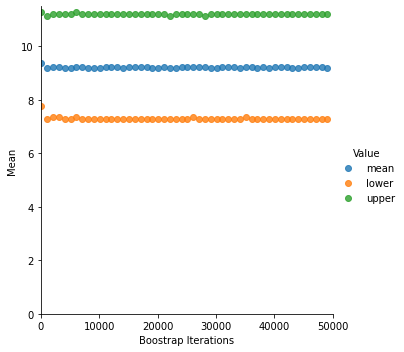

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [16]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")

df2 =pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')

# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


In [17]:
print(30*'*')
print('Data Info')
print('2 Columns Current Fleet : 249 Non Null values and New Fleet : 79 non null values')
print(30*'*')
print(df2.info())
print(30*'*')
print('Data Statistics')
print(30*'*')
print(df2.describe())
print(30*'*')

print(30*'*')
print('Sample Data')
print(30*'*')
print(df2.head())

******************************
Data Info
2 Columns Current Fleet : 249 Non Null values and New Fleet : 79 non null values
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Current fleet  249 non-null    int64  
 1   New Fleet      79 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB
None
******************************
Data Statistics
******************************
       Current fleet  New Fleet
count     249.000000  79.000000
mean       20.144578  30.481013
std         6.414699   6.107710
min         9.000000  18.000000
25%        15.000000  25.500000
50%        19.000000  32.000000
75%        24.000000  34.000000
max        39.000000  47.000000
******************************
******************************
Sample Data
******************************
   Current fleet  New Fleet
0            

In [18]:
print(" New fleet - Range :{}  to {} ".format(df2['New Fleet'].min(),df2['New Fleet'].max()))
print(" Current fleet - Range : {} to {}".format(df2['Current fleet'].min(),df2['Current fleet'].max()))

 New fleet - Range :18.0  to 47.0 
 Current fleet - Range : 9 to 39


In [19]:
c_fleet = df2['Current fleet']
n_fleet = df2['New Fleet'].dropna()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


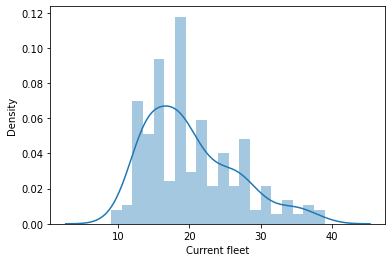

In [20]:
sns.distplot(df2['Current fleet'],bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


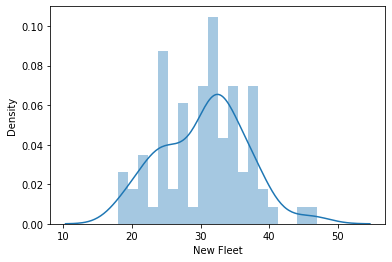

In [21]:
sns.distplot(df2['New Fleet'].dropna(),bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


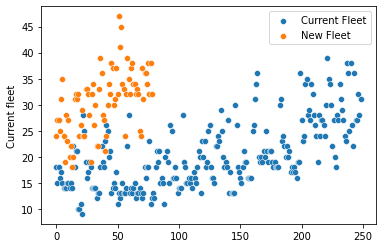

In [22]:
sns.scatterplot(range(len(df2['Current fleet'])),df2['Current fleet'],label= 'Current Fleet')
sns.scatterplot(range(len(df2['New Fleet'].dropna())),df2['New Fleet'].dropna(),label= 'New Fleet')

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [23]:
print(np.mean(c_fleet))
print(np.mean(n_fleet))

20.14457831325301
30.481012658227847


In [24]:
print("Current Fleet: Mean , Lower , Upper : {}".format(bootstrap_mean_ci(c_fleet, len(c_fleet), 10000, 95)))
print("New Fleet: Mean , Lower , Upper : {}".format(bootstrap_mean_ci(n_fleet, len(n_fleet), 10000, 95)))

Current Fleet: Mean , Lower , Upper : (20.146228112449798, 19.3574297188755, 20.951907630522086)
New Fleet: Mean , Lower , Upper : (30.488386075949368, 29.139240506329113, 31.81044303797468)


In [25]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    count = 0
    t_obs = np.mean(sample2) - np.mean(sample1)
    concat_arr =  np.concatenate((sample1,sample2))
    for i in range(n_permutations):
      perm_arr = np.random.permutation(concat_arr)
      sample1_p = perm_arr[:len(sample1)]
      sample2_p = perm_arr[len(sample1):]
      t_new = np.mean(sample2_p) - np.mean(sample1_p)
      # print("tnew : {} tobs :{}".format(t_new,t_obs))
      # print("sample1_p : {} sample1 :{}".format(np.mean(sample1_p),np.mean(sample1)))
      # print("sample2_p : {} sample2 :{}".format(np.mean(sample2_p),np.mean(sample2)))
      if t_new > t_obs:
        count = count + 1

    pvalue = count/n_permutations
    return pvalue

In [76]:
permut_test(c_fleet.values ,n_fleet.values,  1000000)

0.0

In [ ]:
# Null Hypothesis: Current and New Fleet are same
# Alternate Hypothesis : New Fleet is better
# Since p < 0.05 , we reject the Null Hypothesis

In [74]:
# Quiz

In [75]:
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
	
	arr = np.zeros((n_bootstraps, sample_size))
	for bootstraps in range(n_bootstraps):
		arr[bootstraps,:] = np.random.choice(sample,sample_size)
	data_mean = np.std(arr)
	lower = np.percentile(np.std(arr,axis=1),((100-ci)/2))
	upper = np.percentile(np.std(arr,axis=1),(100 - (100-ci)/2))
	return data_mean, lower, upper

In [ ]:
bootstrap_mean_ci(data, data.shape[0], 10000 , 95)

In [ ]:
bootstrap_std_ci(data, data.shape[0], 10000 , 73)

In [ ]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

In [ ]:
len(dem_share_PA)

In [ ]:
len(dem_share_OH)

In [39]:
a = np.array(dem_share_PA)
bootstrap_mean_ci(a, len(a), 25000, 90)

(45.469850973134314, 43.54670149253731, 47.454373134328364)

In [40]:
b = np.array(dem_share_OH)
bootstrap_mean_ci(b, len(b), 25000, 90)

(44.30159228181818, 42.58464772727273, 46.03150568181818)

In [43]:
permut_test(b, a, 20000)

0.2342